In [1]:
# Importing required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

### **Loading csv file**

In [2]:
df=pd.read_csv(r"Multiple CSV/2.concerticcir1.csv",header=None) 
df.head()   

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [4]:
# Checking whether target variable is balanced or not
df[2].value_counts() 

2
1.0    50
0.0    50
Name: count, dtype: int64

**Observation:**
- The data is balanced with 50% as 1 and 50% as 0.

### **Identifying Input and Output Features**

In [5]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int) 

In [6]:
x.head() 

,0,1
0,-0.382891,-0.090840
1,-0.020962,-0.477874
2,-0.396116,-1.289427
3,-0.618130,-0.063837
4,0.703478,-0.187038


### Split the data into train and test 

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

In [8]:
# Train and test shape
print(x_train.shape) 
print(x_test.shape)

(90, 2)
(10, 2)


### Standardizing Input features

In [9]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

### Rescaling numerical Input(train and test) features

In [10]:
# Fit and transform on train data
x_train=std.fit_transform(x_train)

# Transform on test data
x_test=std.transform(x_test)  

### **Building the Logical Structure**

In [11]:
# Importing libraries to build a neural network 
from keras import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization

from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD 

In [31]:
model=Sequential()
model.add(Dense(18,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(10,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(4,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid"))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 18)                54        
                                                                 
 dense_14 (Dense)            (None, 16)                304       
                                                                 
 dense_15 (Dense)            (None, 10)                170       
                                                                 
 dense_16 (Dense)            (None, 4)                 44        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### compiling the model 

In [35]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=15,epochs=100,validation_split=0.1) 

Epoch 1/100
6/6 [==============================] - 1s 60ms/step - loss: 0.6593 - accuracy: 0.8025 - val_loss: 0.6414 - val_accuracy: 0.8889
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.6577 - accuracy: 0.8025 - val_loss: 0.6408 - val_accuracy: 0.8889
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6571 - accuracy: 0.8025 - val_loss: 0.6406 - val_accuracy: 0.8889
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6563 - accuracy: 0.8025 - val_loss: 0.6387 - val_accuracy: 0.8889
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 0.6547 - accuracy: 0.8148 - val_loss: 0.6375 - val_accuracy: 0.8889
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6539 - accuracy: 0.8025 - val_loss: 0.6357 - val_accuracy: 0.8889
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6527 - accuracy: 0.8148 - val_loss: 0.6350 - val_accuracy: 0.8889
Epoch 8/100
6/6 [===

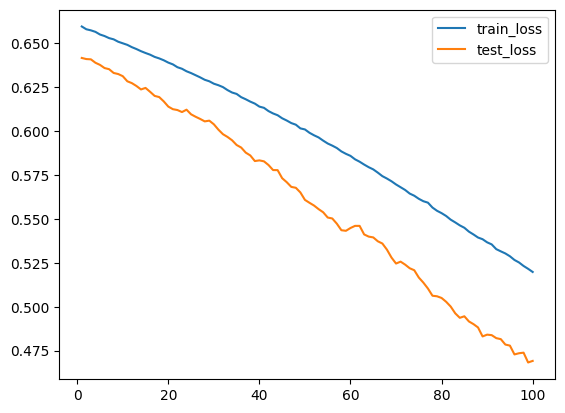

In [37]:
plt.plot(range(1,101),history.history["loss"],label="train_loss")
plt.plot(range(1,101),history.history["val_loss"],label="test_loss") 
plt.legend()

### Predicting the model 

In [38]:
predicted=model.predict(x_test) 
predicted 

1/1 [==============================] - 0s 84ms/step


array([[0.6529581 ],
       [0.63498324],
       [0.19323705],
       [0.43972674],
       [0.18520477],
       [0.16665967],
       [0.6342365 ],
       [0.21986055],
       [0.3468449 ],
       [0.36950657]], dtype=float32)

**Observation:**
- As predicted values are in probability values and we want predicted label either 1 or 0, if probability value is >0.5 then predicted label will be as 1 and if <= 0.5 then predicted label will be as 0.

In [39]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

### **Evaluating the model**

In [40]:
# Accuracy for the model
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print('Accuracy:',accuracy_score(y_test,predicted))

Accuracy: 0.9


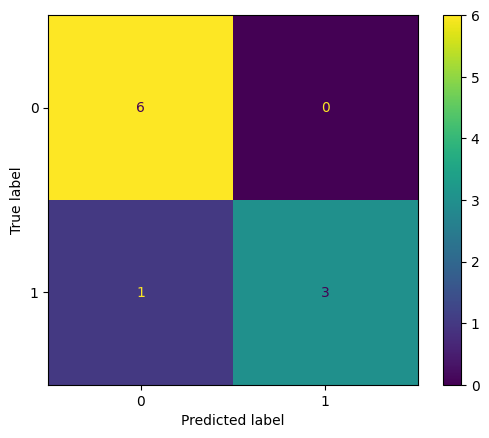

In [41]:
# Plotting confusion matrix to visual the correctly predicted labels
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

**Observation:**
- As diagonal elements should be as high as possible, We can conclude model predictions are correct.

### **PLOTING THE DECISION SURFACE**

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

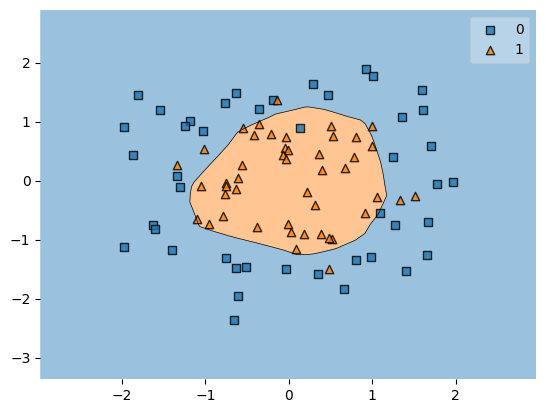

In [42]:
# Decision surface on train data
from mlxtend.plotting  import plot_decision_regions  
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

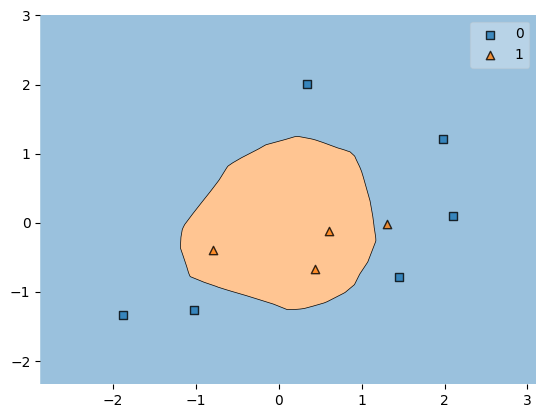

In [43]:
# Decision surface on test data
plot_decision_regions(x_test,y_test.values,clf=model)  

## **Conclusions:**
- This neural network model achieves an accuracy of 90%. The model architecture consists of 4 hidden layers.
- In the first hidden layer, there are 18 neurons with the ReLU activation function and an L2 regularizer with learning rate as 0.001.
- In the second hidden layer, there are 16 neurons with the ReLU activation function and an L2 regularizer with learning rate as 0.001.
- In the third hidden layer, there are 10 neurons with the ReLU activation function and an L2 regularizer with learning rate as 0.001.

- The output layer uses the sigmoid activation function.

### In model compilation,
- Loss function is Binary cross-entropy as our target variable is like 0's and 1's.
- Optimizer is SGD(Stochastic Gradient Descent) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 100 epochs.
 
- **Overall, this neural network model architecture and training configuration achieve an accuracy of 90%.**